In [5]:
from IPython.display import SVG
import pandas as pd
from urllib.request import urlretrieve
import zipfile
import collections

In [15]:
urlretrieve("http://files.grouplens.org/datasets/movielens/ml-100k.zip", "movielens.zip")
zip_ref = zipfile.ZipFile('movielens.zip', "r")
zip_ref.extractall()

users_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=users_cols, encoding='latin-1')
ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1')

genre_cols = [
    "genre_unknown", "Action", "Adventure", "Animation", "Children", "Comedy",
    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
    "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
]
movies_cols = [
    'movie_id', 'title', 'release_date', "video_release_date", "imdb_url"
] + genre_cols
movies = pd.read_csv(
    'ml-100k/u.item', sep='|', names=movies_cols, encoding='latin-1')

users["user_id"] = users["user_id"].apply(lambda x: int(x-1))
movies["movie_id"] = movies["movie_id"].apply(lambda x: int(x-1))
ratings["movie_id"] = ratings["movie_id"].apply(lambda x: int(x-1))
ratings["user_id"] = ratings["user_id"].apply(lambda x: int(x-1))
ratings["rating"] = ratings["rating"].apply(lambda x: float(x))

Done. Dataset contains:
b'943 users\n1682 items\n100000 ratings\n'


In [16]:
movielens = ratings.merge(movies, on='movie_id').merge(users, on='user_id')

In [17]:
movielens = movielens.drop(columns=['release_date', 'video_release_date'])
movielens.head()

,user_id,movie_id,rating,unix_timestamp,title,imdb_url,genre_unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,sex,occupation,zip_code
0,195,241,3.0,881250949,Kolya (1996),http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49,M,writer,55105
1,195,256,2.0,881251577,Men in Black (1997),http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,49,M,writer,55105
2,195,110,4.0,881251793,"Truth About Cats & Dogs, The (1996)",http://us.imdb.com/M/title-exact?Truth%20About...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,49,M,writer,55105
3,195,24,4.0,881251955,"Birdcage, The (1996)","http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49,M,writer,55105
4,195,381,4.0,881251843,"Adventures of Priscilla, Queen of the Desert, ...",http://us.imdb.com/M/title-exact?Adventures%20...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,49,M,writer,55105


In [3]:
import pycaret
from pycaret.regression import *

In [21]:
reg1 = setup(data = movierate, target = 'rating', create_clusters = True, train_size = 0.7, feature_selection = True)

,Description,Value
0,session_id,5830
1,Target,rating
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(3000, 29)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,24
8,Ordinal Features,False
9,High Cardinality Features,False


In [25]:
top5 = compare_models(n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.3840,0.6426,0.3031,0.3862,0.3609,0.1477,0.1524,7.130
et,Extra Trees Classifier,0.3797,0.6513,0.3201,0.3748,0.3677,0.1553,0.1572,1.259
rf,Random Forest Classifier,0.3778,0.6558,0.3178,0.3700,0.3638,0.1510,0.1531,1.118
knn,K Neighbors Classifier,0.3693,0.6239,0.3350,0.3688,0.3654,0.1603,0.1611,0.246
lightgbm,Light Gradient Boosting Machine,0.3678,0.6434,0.3358,0.3669,0.3638,0.1506,0.1512,0.524
ridge,Ridge Classifier,0.3616,0.0000,0.3133,0.3550,0.3541,0.1411,0.1419,0.102
ada,Ada Boost Classifier,0.3559,0.5924,0.2933,0.3499,0.3322,0.1137,0.1175,0.521
lda,Linear Discriminant Analysis,0.3559,0.6135,0.3079,0.3508,0.3491,0.1378,0.1387,0.995
dt,Decision Tree Classifier,0.3411,0.5590,0.3034,0.3391,0.3386,0.1214,0.1217,0.100
nb,Naive Bayes,0.3278,0.5671,0.2199,0.2579,0.2580,0.0402,0.0467,0.072


In [26]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4048,0.6669,0.3456,0.4021,0.3927,0.1878,0.1902
1,0.3857,0.6402,0.3208,0.3820,0.3728,0.1613,0.1640
2,0.3810,0.6501,0.3165,0.3673,0.3651,0.1585,0.1601
3,0.4000,0.6759,0.3282,0.3892,0.3829,0.1801,0.1834
4,0.3771,0.6617,0.3284,0.3689,0.3657,0.1532,0.1548
Mean,0.3897,0.6590,0.3279,0.3819,0.3759,0.1682,0.1705
SD,0.0108,0.0126,0.0099,0.0130,0.0106,0.0134,0.0138


In [27]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4190,0.6680,0.3104,0.4749,0.3749,0.1800,0.1938
1,0.3857,0.6528,0.2626,0.3549,0.3233,0.1304,0.1475
2,0.3619,0.6239,0.2759,0.3327,0.3113,0.0991,0.1116
3,0.3667,0.6373,0.2828,0.3694,0.3289,0.1097,0.1180
4,0.3476,0.6120,0.2423,0.3305,0.2987,0.0836,0.0922
5,0.4333,0.6807,0.3406,0.4406,0.4028,0.2110,0.2233
6,0.3762,0.6375,0.2861,0.3926,0.3220,0.1219,0.1372
7,0.4095,0.6896,0.2907,0.4019,0.3599,0.1657,0.1835
8,0.3714,0.6664,0.2821,0.3978,0.3343,0.1217,0.1318
9,0.3684,0.6543,0.2749,0.4259,0.3271,0.1089,0.1238


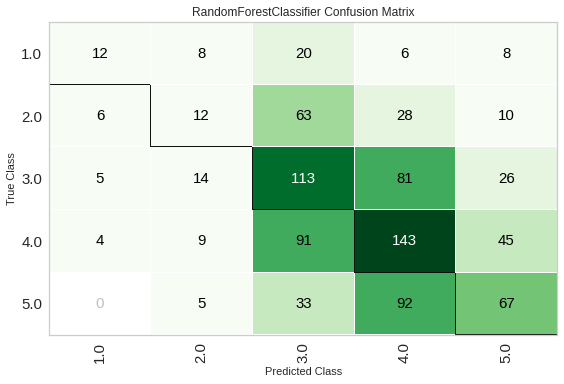

In [28]:
plot_model(rf, plot = 'confusion_matrix')

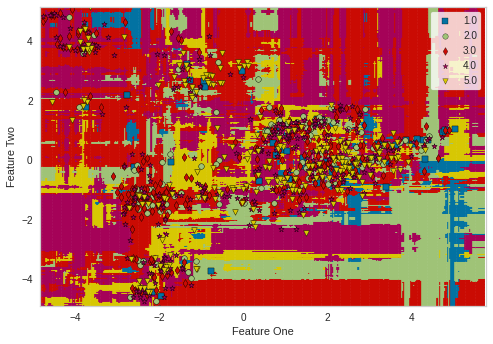

In [29]:
plot_model(rf, plot = 'boundary')

In [30]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…